### Initializations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST

from torchsummary import summary

# Section 1: GANs (Generative Adversarial Networks)

### Part 1: GAN Implementation

In [2]:
# Defining the transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Loading in the MNIST dataset
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Splitting the dataset into training, validation, and test sets
train_size = int(0.8 * len(mnist_data))
val_size = int(0.1 * len(mnist_data))
test_size = len(mnist_data) - train_size - val_size

train_data, val_data, test_data = random_split(mnist_data, [train_size, val_size, test_size])

# Creating dataloaders for each set
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Displaying information about the sizes of each set
print(f'Train set size: {len(train_data)}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

Train set size: 48000
Validation set size: 6000
Test set size: 6000


In [3]:
# Displaying Available GPU Information
num_gpus = torch.cuda.device_count()
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    print(f"  Memory Allocated: {torch.cuda.memory_allocated(i) / 1024 ** 2:.2f} MB")
    print(f"  Memory Cached: {torch.cuda.memory_reserved(i) / 1024 ** 2:.2f} MB")
    print(f"  Memory Free: {(torch.cuda.get_device_properties(i).total_memory - torch.cuda.memory_allocated(i)) / 1024 ** 2:.2f} MB")
    print(f"  Total Memory: {torch.cuda.get_device_properties(i).total_memory / 1024 ** 2:.2f} MB")
    print()

GPU 0: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 1: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 2: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 3: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 4: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 5: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB



In [4]:
# Choosing which GPU to use
# Note: Manually set to choose GPU 2 since that one seemed to typically have enough memory free
if torch.cuda.is_available() and torch.cuda.device_count() > 2:
    device = torch.device("cuda:2")
    print(f"Using GPU: {torch.cuda.get_device_name(2)}")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using default GPU or CPU")

Using GPU: NVIDIA RTX A4000


In [5]:
# Defining a function to show the generator output at various steps
def visualize_generator_output(G, z_dim, device, num_images=10):
    # Generate random noise
    z = torch.randn(num_images, z_dim).to(device)
    
    # Generate fake images
    fake_images = G(z)
    
    # Reshape the fake images to 28x28
    fake_images = fake_images.view(fake_images.size(0), 28, 28).cpu().detach().numpy()
    
    # Plot the fake images
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [6]:
# Defining both the generator and discriminator
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

Epoch [1/201], D Loss: 0.2793258090664943, G Loss: 3.4512526624202726
Generator output at epoch 0


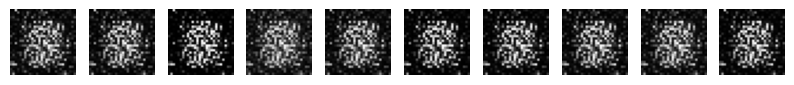

Epoch [2/201], D Loss: 0.18861137070506812, G Loss: 3.8780348116556804
Epoch [3/201], D Loss: 0.1643054249311487, G Loss: 3.56340469233195
Epoch [4/201], D Loss: 0.13329484467208386, G Loss: 4.37743843460083
Epoch [5/201], D Loss: 0.11878670099625985, G Loss: 5.031513736406962
Epoch [6/201], D Loss: 0.1341111591036121, G Loss: 4.852395878156027
Epoch [7/201], D Loss: 0.1471418231377999, G Loss: 5.245245579401652
Epoch [8/201], D Loss: 0.16986006165047488, G Loss: 4.9219340902964275
Epoch [9/201], D Loss: 0.14382053051888943, G Loss: 5.417698861440023
Epoch [10/201], D Loss: 0.15996409588307142, G Loss: 5.21464657274882
Epoch [11/201], D Loss: 0.13405945904552938, G Loss: 5.313605777422587
Generator output at epoch 10


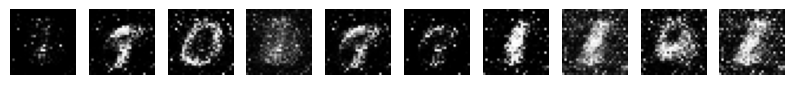

Epoch [12/201], D Loss: 0.12474387257484099, G Loss: 5.569041856447855
Epoch [13/201], D Loss: 0.11867689210052292, G Loss: 5.483166635195414
Epoch [14/201], D Loss: 0.12437451963995894, G Loss: 5.792749397277832
Epoch [15/201], D Loss: 0.1498448356464505, G Loss: 6.113719079971314
Epoch [16/201], D Loss: 0.14538535388062399, G Loss: 5.3127979437510175
Epoch [17/201], D Loss: 0.1893105853597323, G Loss: 5.2702800534566245
Epoch [18/201], D Loss: 0.1641813823133707, G Loss: 5.096710059165955
Epoch [19/201], D Loss: 0.19469209407269955, G Loss: 5.080746935049693
Epoch [20/201], D Loss: 0.19378532290955386, G Loss: 5.032321746826172
Epoch [21/201], D Loss: 0.21027191660304864, G Loss: 5.046821767171224
Generator output at epoch 20


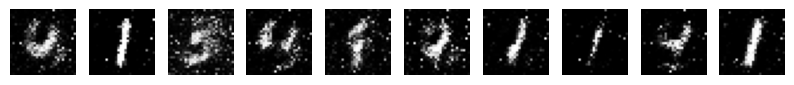

Epoch [22/201], D Loss: 0.233036494354407, G Loss: 4.901733664512634
Epoch [23/201], D Loss: 0.24830308447778224, G Loss: 4.563689626375834
Epoch [24/201], D Loss: 0.28252349426349005, G Loss: 3.9517190438906353
Epoch [25/201], D Loss: 0.32066174495220184, G Loss: 3.8629761907259623
Epoch [26/201], D Loss: 0.32416785089174904, G Loss: 3.7641369258562722
Epoch [27/201], D Loss: 0.3200737594862779, G Loss: 3.761138210614522
Epoch [28/201], D Loss: 0.3497666880985101, G Loss: 3.4625981550216673
Epoch [29/201], D Loss: 0.41184302081664403, G Loss: 3.0574503642717996
Epoch [30/201], D Loss: 0.42312429440021515, G Loss: 2.8791001224517823
Epoch [31/201], D Loss: 0.43141091652711233, G Loss: 2.8879056779543557
Generator output at epoch 30


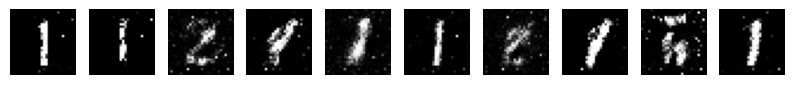

Epoch [32/201], D Loss: 0.3810858359833558, G Loss: 3.1768729667663576
Epoch [33/201], D Loss: 0.3678550898035367, G Loss: 3.4473920068740846
Epoch [34/201], D Loss: 0.37504469138383867, G Loss: 3.4229506548245747
Epoch [35/201], D Loss: 0.39635097193717955, G Loss: 3.1568336596488953
Epoch [36/201], D Loss: 0.45581986411412556, G Loss: 2.6661976237297056
Epoch [37/201], D Loss: 0.48781942560275393, G Loss: 2.523478177388509
Epoch [38/201], D Loss: 0.47981430747111636, G Loss: 2.5303846666018166
Epoch [39/201], D Loss: 0.5012246398925781, G Loss: 2.4587427859306334
Epoch [40/201], D Loss: 0.47150495755672456, G Loss: 2.6064401863416036
Epoch [41/201], D Loss: 0.4691750196615855, G Loss: 2.6562473861376446
Generator output at epoch 40


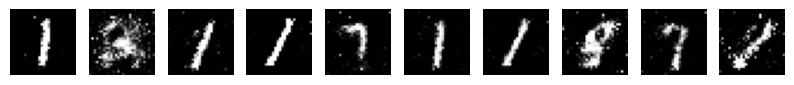

Epoch [42/201], D Loss: 0.48866739545265836, G Loss: 2.514444113413493
Epoch [43/201], D Loss: 0.489439021507899, G Loss: 2.5015831495920815
Epoch [44/201], D Loss: 0.5055566414992014, G Loss: 2.383169307867686
Epoch [45/201], D Loss: 0.5019913019339244, G Loss: 2.3700616103808083
Epoch [46/201], D Loss: 0.5331326402425766, G Loss: 2.265254636446635
Epoch [47/201], D Loss: 0.5303415021300316, G Loss: 2.3043312169710797
Epoch [48/201], D Loss: 0.5296983301242193, G Loss: 2.354279437541962
Epoch [49/201], D Loss: 0.5403707760969798, G Loss: 2.2711395432154338
Epoch [50/201], D Loss: 0.561487776239713, G Loss: 2.211386400222778
Epoch [51/201], D Loss: 0.573164847334226, G Loss: 2.1316964875857036
Generator output at epoch 50


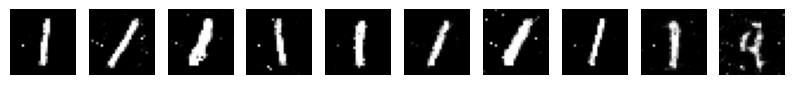

Epoch [52/201], D Loss: 0.5815900761286418, G Loss: 2.0952034351030986
Epoch [53/201], D Loss: 0.575343513528506, G Loss: 2.123752204100291
Epoch [54/201], D Loss: 0.5629227581818899, G Loss: 2.2050719610850016
Epoch [55/201], D Loss: 0.5709760564565659, G Loss: 2.1728742445309956
Epoch [56/201], D Loss: 0.5774258652130763, G Loss: 2.17360785706838
Epoch [57/201], D Loss: 0.5980736104249954, G Loss: 2.097409606933594
Epoch [58/201], D Loss: 0.604387400786082, G Loss: 2.079278207143148
Epoch [59/201], D Loss: 0.6121295226017635, G Loss: 2.0210613074302675
Epoch [60/201], D Loss: 0.6108971965710323, G Loss: 2.0562908798853554
Epoch [61/201], D Loss: 0.6176713839371999, G Loss: 2.0487953572273256
Generator output at epoch 60


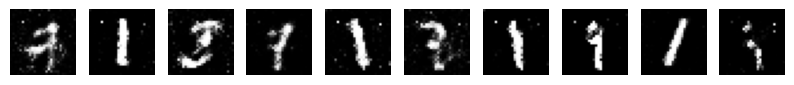

Epoch [62/201], D Loss: 0.6126124606927236, G Loss: 2.0332540307044984
Epoch [63/201], D Loss: 0.627825031042099, G Loss: 2.009794249693553
Epoch [64/201], D Loss: 0.6123278493881226, G Loss: 2.0396748253504433
Epoch [65/201], D Loss: 0.619466939608256, G Loss: 2.0097220923105876
Epoch [66/201], D Loss: 0.6175525174935659, G Loss: 2.0364800267219545
Epoch [67/201], D Loss: 0.6213587683439254, G Loss: 2.0208488359451295
Epoch [68/201], D Loss: 0.6192584402561188, G Loss: 2.014978246529897
Epoch [69/201], D Loss: 0.6247098268270492, G Loss: 2.0427492796579996
Epoch [70/201], D Loss: 0.6487723825772603, G Loss: 1.927955104192098
Epoch [71/201], D Loss: 0.6469956509669622, G Loss: 1.958535718758901
Generator output at epoch 70


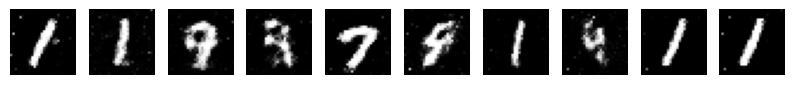

Epoch [72/201], D Loss: 0.6573335709969202, G Loss: 1.8905921026865642
Epoch [73/201], D Loss: 0.6618536175489426, G Loss: 1.9078511632283528
Epoch [74/201], D Loss: 0.6493448218504588, G Loss: 1.923633681933085
Epoch [75/201], D Loss: 0.6599573678572973, G Loss: 1.8844053312937419
Epoch [76/201], D Loss: 0.6637028498649598, G Loss: 1.9099280044237772
Epoch [77/201], D Loss: 0.6730146448214849, G Loss: 1.8583795024553935
Epoch [78/201], D Loss: 0.6668130535284679, G Loss: 1.8823673181533813
Epoch [79/201], D Loss: 0.6678977478345235, G Loss: 1.8879526987075805
Epoch [80/201], D Loss: 0.6750109851360321, G Loss: 1.8655444170633952
Epoch [81/201], D Loss: 0.6748850349982579, G Loss: 1.8534167439142863
Generator output at epoch 80


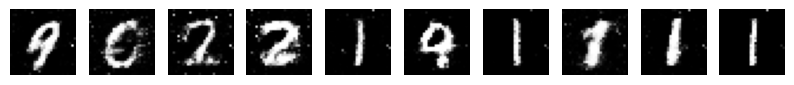

Epoch [82/201], D Loss: 0.676928875486056, G Loss: 1.8640074243545532
Epoch [83/201], D Loss: 0.6748690510590871, G Loss: 1.8676092216173807
Epoch [84/201], D Loss: 0.6760756374994914, G Loss: 1.8733610429763794
Epoch [85/201], D Loss: 0.6801895793676377, G Loss: 1.848868093172709
Epoch [86/201], D Loss: 0.6811078610022863, G Loss: 1.8532298941612244
Epoch [87/201], D Loss: 0.6936081374088923, G Loss: 1.823526792049408
Epoch [88/201], D Loss: 0.6965751845439275, G Loss: 1.8169417026837666
Epoch [89/201], D Loss: 0.6909967467784882, G Loss: 1.831253537495931
Epoch [90/201], D Loss: 0.7052731118202209, G Loss: 1.8111256275177001
Epoch [91/201], D Loss: 0.7061838743289311, G Loss: 1.7983534695307413
Generator output at epoch 90


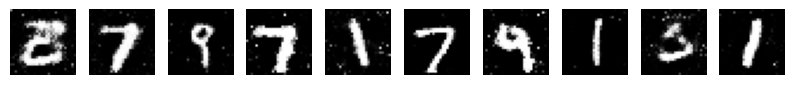

Epoch [92/201], D Loss: 0.6992468965848287, G Loss: 1.8294481180508932
Epoch [93/201], D Loss: 0.7086322300831477, G Loss: 1.7824548681577046
Epoch [94/201], D Loss: 0.7084777879317602, G Loss: 1.8095730169614157
Epoch [95/201], D Loss: 0.7014818789958954, G Loss: 1.795783022403717
Epoch [96/201], D Loss: 0.708889647603035, G Loss: 1.786172473271688
Epoch [97/201], D Loss: 0.7070871773958206, G Loss: 1.7980923139254252
Epoch [98/201], D Loss: 0.7144491307735443, G Loss: 1.7867956697146097
Epoch [99/201], D Loss: 0.7093883735736212, G Loss: 1.780580902258555
Epoch [100/201], D Loss: 0.7207229920228322, G Loss: 1.763186799367269
Epoch [101/201], D Loss: 0.7194854288101197, G Loss: 1.7556617685953777
Generator output at epoch 100


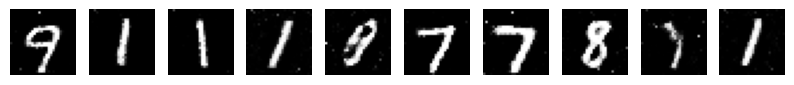

Epoch [102/201], D Loss: 0.7257378473679225, G Loss: 1.7545495861371359
Epoch [103/201], D Loss: 0.7216686233679453, G Loss: 1.7552955479621888
Epoch [104/201], D Loss: 0.7263567889134089, G Loss: 1.7653431088129679
Epoch [105/201], D Loss: 0.7194084209601085, G Loss: 1.7518664048512778
Epoch [106/201], D Loss: 0.7218248233397802, G Loss: 1.7749113847414653
Epoch [107/201], D Loss: 0.7248192331790924, G Loss: 1.74179647620519
Epoch [108/201], D Loss: 0.7241090573469797, G Loss: 1.7567950806617736
Epoch [109/201], D Loss: 0.7207474529743194, G Loss: 1.744133064587911
Epoch [110/201], D Loss: 0.7251773102680842, G Loss: 1.736704580783844
Epoch [111/201], D Loss: 0.7227331086794535, G Loss: 1.736787180741628
Generator output at epoch 110


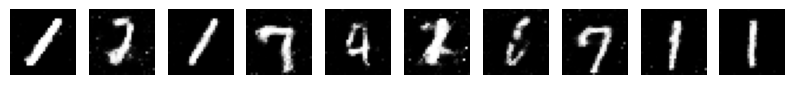

Epoch [112/201], D Loss: 0.7155852926572164, G Loss: 1.7527600507736205
Epoch [113/201], D Loss: 0.7233311129013698, G Loss: 1.7444678031603496
Epoch [114/201], D Loss: 0.7229660582145055, G Loss: 1.7457654565175373
Epoch [115/201], D Loss: 0.7270548484325409, G Loss: 1.744225785891215
Epoch [116/201], D Loss: 0.7199435787598292, G Loss: 1.735535285949707
Epoch [117/201], D Loss: 0.7203443095286687, G Loss: 1.7423485860824586
Epoch [118/201], D Loss: 0.7159131641387939, G Loss: 1.7432542943954468
Epoch [119/201], D Loss: 0.719881572206815, G Loss: 1.735891546567281
Epoch [120/201], D Loss: 0.7187845485607783, G Loss: 1.752436646938324
Epoch [121/201], D Loss: 0.7201137812534968, G Loss: 1.7429977337519327
Generator output at epoch 120


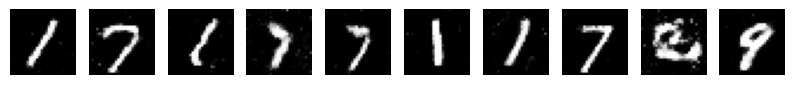

Epoch [122/201], D Loss: 0.715468326886495, G Loss: 1.7424536458651225
Epoch [123/201], D Loss: 0.7224855400323867, G Loss: 1.744015861193339
Epoch [124/201], D Loss: 0.7185392596721649, G Loss: 1.7444579025904337
Epoch [125/201], D Loss: 0.7209362541039784, G Loss: 1.7454186180432638
Epoch [126/201], D Loss: 0.7190827186107636, G Loss: 1.7415870838165284
Epoch [127/201], D Loss: 0.7156375926733017, G Loss: 1.747785211245219
Epoch [128/201], D Loss: 0.7190749262571334, G Loss: 1.7461067954699199
Epoch [129/201], D Loss: 0.7176532958348593, G Loss: 1.7493186960220337
Epoch [130/201], D Loss: 0.7196287379264832, G Loss: 1.7384941337903341
Epoch [131/201], D Loss: 0.7153719416459401, G Loss: 1.7260008843739827
Generator output at epoch 130


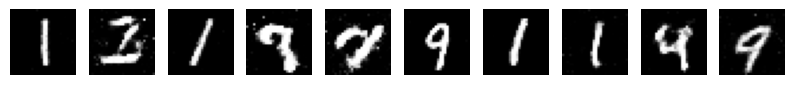

Epoch [132/201], D Loss: 0.7155587435166041, G Loss: 1.7404528681437175
Epoch [133/201], D Loss: 0.7089187130133311, G Loss: 1.7540133272806804
Epoch [134/201], D Loss: 0.7083302313486735, G Loss: 1.7626946369806926
Epoch [135/201], D Loss: 0.7123975762923559, G Loss: 1.7490519534746807
Epoch [136/201], D Loss: 0.7083547784090042, G Loss: 1.7730450107256572
Epoch [137/201], D Loss: 0.7134554719130198, G Loss: 1.7614552709261577
Epoch [138/201], D Loss: 0.7129452469348907, G Loss: 1.744989102045695
Epoch [139/201], D Loss: 0.7133121015230814, G Loss: 1.7472721858024598
Epoch [140/201], D Loss: 0.70707406326135, G Loss: 1.7697657890319825
Epoch [141/201], D Loss: 0.702716933687528, G Loss: 1.7712369432449342
Generator output at epoch 140


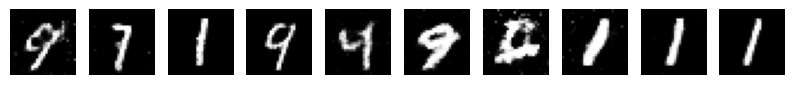

Epoch [142/201], D Loss: 0.7017567853530248, G Loss: 1.76052632745107
Epoch [143/201], D Loss: 0.7008832745154698, G Loss: 1.7676873068809509
Epoch [144/201], D Loss: 0.7050313959519069, G Loss: 1.7659505616823832
Epoch [145/201], D Loss: 0.702957311908404, G Loss: 1.749262441635132
Epoch [146/201], D Loss: 0.6952105464140574, G Loss: 1.782639436086019
Epoch [147/201], D Loss: 0.6949034937222799, G Loss: 1.7906286433537801
Epoch [148/201], D Loss: 0.6928339313268661, G Loss: 1.8006408735911053
Epoch [149/201], D Loss: 0.696393382747968, G Loss: 1.7905739243825276
Epoch [150/201], D Loss: 0.6895729927619298, G Loss: 1.802517553170522
Epoch [151/201], D Loss: 0.690184226433436, G Loss: 1.7870457606315613
Generator output at epoch 150


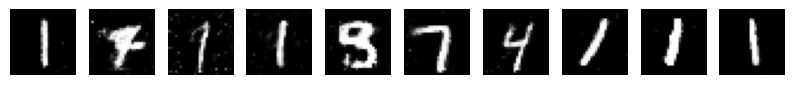

Epoch [152/201], D Loss: 0.6927846053441366, G Loss: 1.7834644621213278
Epoch [153/201], D Loss: 0.6853554649353027, G Loss: 1.8036838994026183
Epoch [154/201], D Loss: 0.6843775980075201, G Loss: 1.8001330432891847
Epoch [155/201], D Loss: 0.6858830854495367, G Loss: 1.7924270122845967
Epoch [156/201], D Loss: 0.678816228667895, G Loss: 1.8120618917147318
Epoch [157/201], D Loss: 0.681436572432518, G Loss: 1.8200984128316244
Epoch [158/201], D Loss: 0.6857729322910309, G Loss: 1.8207966893513998
Epoch [159/201], D Loss: 0.6735930439631144, G Loss: 1.8190889077186585
Epoch [160/201], D Loss: 0.6730338905652364, G Loss: 1.8196465822855632
Epoch [161/201], D Loss: 0.6685073216756184, G Loss: 1.841721436182658
Generator output at epoch 160


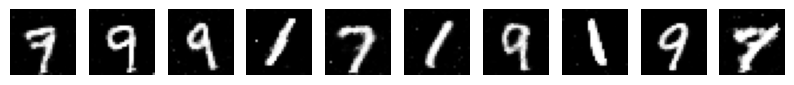

Epoch [162/201], D Loss: 0.6705031859477361, G Loss: 1.8369276604652405
Epoch [163/201], D Loss: 0.6688139373064041, G Loss: 1.8174783824284872
Epoch [164/201], D Loss: 0.6663372904062271, G Loss: 1.832571491877238
Epoch [165/201], D Loss: 0.6645684167544047, G Loss: 1.84700119638443
Epoch [166/201], D Loss: 0.6684831227461497, G Loss: 1.835976815223694
Epoch [167/201], D Loss: 0.6651343254248301, G Loss: 1.8588689657847086
Epoch [168/201], D Loss: 0.6596780156691869, G Loss: 1.8465589408874512
Epoch [169/201], D Loss: 0.6587276500463486, G Loss: 1.8682112013498942
Epoch [170/201], D Loss: 0.6577980768283208, G Loss: 1.8585988713900248
Epoch [171/201], D Loss: 0.6530438438653946, G Loss: 1.8636043510437013
Generator output at epoch 170


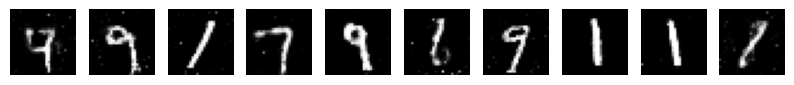

Epoch [172/201], D Loss: 0.6531776183048884, G Loss: 1.8784203797976176
Epoch [173/201], D Loss: 0.6488967046340307, G Loss: 1.8709208828608195
Epoch [174/201], D Loss: 0.6472281644741694, G Loss: 1.866394605954488
Epoch [175/201], D Loss: 0.6437482253710429, G Loss: 1.8819170223871866
Epoch [176/201], D Loss: 0.6398364672263464, G Loss: 1.8828259178797404
Epoch [177/201], D Loss: 0.6365605412721634, G Loss: 1.8962753143310547
Epoch [178/201], D Loss: 0.6403788820505142, G Loss: 1.9003963101704915
Epoch [179/201], D Loss: 0.6329387067556381, G Loss: 1.892056683063507
Epoch [180/201], D Loss: 0.6365140417814255, G Loss: 1.897525226275126
Epoch [181/201], D Loss: 0.6338321723540624, G Loss: 1.9208769014676412
Generator output at epoch 180


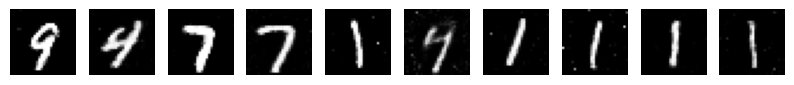

Epoch [182/201], D Loss: 0.629584229071935, G Loss: 1.911504174232483
Epoch [183/201], D Loss: 0.6293136239051819, G Loss: 1.9178638531366985
Epoch [184/201], D Loss: 0.6226752187808354, G Loss: 1.927536197980245
Epoch [185/201], D Loss: 0.6222565875053406, G Loss: 1.9220739755630494
Epoch [186/201], D Loss: 0.6202377372980118, G Loss: 1.9389413855870565
Epoch [187/201], D Loss: 0.6200815962553025, G Loss: 1.9419012829462687
Epoch [188/201], D Loss: 0.6204611123800278, G Loss: 1.935351089000702
Epoch [189/201], D Loss: 0.615879125157992, G Loss: 1.9437979590098062
Epoch [190/201], D Loss: 0.613929330309232, G Loss: 1.9420328553517658
Epoch [191/201], D Loss: 0.6118118708928426, G Loss: 1.9602955684661865
Generator output at epoch 190


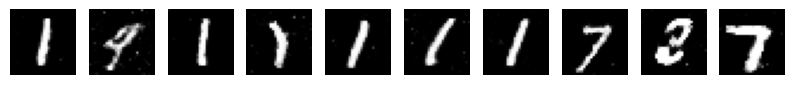

Epoch [192/201], D Loss: 0.61338256529967, G Loss: 1.9589380577405293
Epoch [193/201], D Loss: 0.6094473340113957, G Loss: 1.9566332726478577
Epoch [194/201], D Loss: 0.6060255111853282, G Loss: 1.9604924488067628
Epoch [195/201], D Loss: 0.6006899892091752, G Loss: 1.96614839331309
Epoch [196/201], D Loss: 0.6035110356807709, G Loss: 1.9793283452987671
Epoch [197/201], D Loss: 0.6013624068498612, G Loss: 1.9872676467895507
Epoch [198/201], D Loss: 0.5963630092938741, G Loss: 2.0014324056307475
Epoch [199/201], D Loss: 0.5987507401704788, G Loss: 1.992237828095754
Epoch [200/201], D Loss: 0.5926427151759466, G Loss: 1.9832413665453592
Epoch [201/201], D Loss: 0.5928516320387522, G Loss: 2.0027352471351625
Generator output at epoch 200


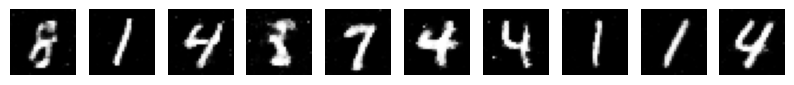

In [7]:
# Setting the Hyperparameters
z_dim = 100
hidden_size = 512
image_size = 28 * 28
lr = 0.0001
num_epochs = 201

# Initializing the generator and discriminator on the chosen device
G = Generator(z_dim, hidden_size, image_size).to(device)
D = Discriminator(image_size, hidden_size, 1).to(device)

# Defining loss criterion and optimizers
criterion = nn.BCELoss()
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr)

# Training loop:
D_losses = [] # Creating blank lists to store losses
G_losses = []

for epoch in range(num_epochs):
    D_epoch_loss = 0.0
    G_epoch_loss = 0.0
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1).to(device)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Discriminator Training
        D_optimizer.zero_grad()
        outputs = D(real_images)
        D_real_loss = criterion(outputs, real_labels)

        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        D_fake_loss = criterion(outputs, fake_labels)

        D_loss = D_real_loss + D_fake_loss
        D_loss.backward()
        D_optimizer.step()

        # Generator Training
        G_optimizer.zero_grad()
        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        G_loss.backward()
        G_optimizer.step()

        D_epoch_loss += D_loss.item()
        G_epoch_loss += G_loss.item()

    # Appending lists of losses with calculated values
    D_losses.append(D_epoch_loss / len(train_loader))
    G_losses.append(G_epoch_loss / len(train_loader))

    # Printing loss information for the epoch to be able to keep an eye on training
    print(f'Epoch [{epoch+1}/{num_epochs}], D Loss: {D_losses[-1]}, G Loss: {G_losses[-1]}')

    # Plotting generator output every 10 epochs
    if epoch % 10 == 0:
        print(f'Generator output at epoch {epoch}')
        visualize_generator_output(G, z_dim,device=device)

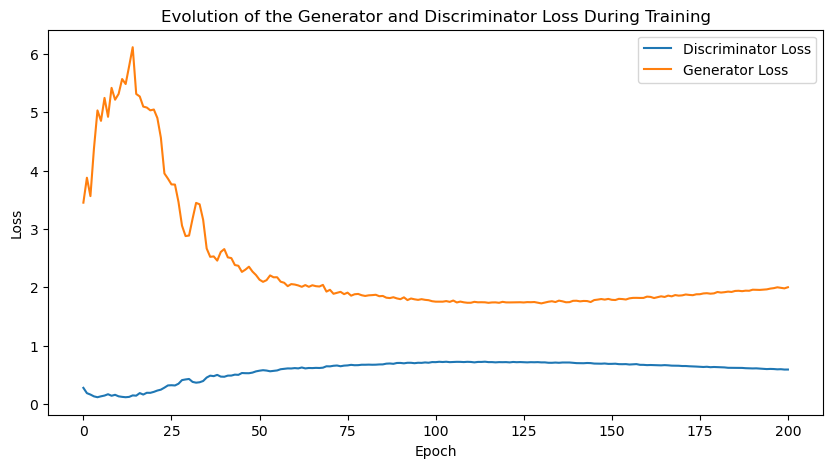

In [8]:
# Plotting the Training Results
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label='Discriminator Loss')
plt.plot(G_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolution of the Generator and Discriminator Loss During Training')
plt.show()

### Part 2: DCGAN for Image Generation
Starting with a similar intialization and setup of the visualization function to the GAN, but switching to the CIFAR-10 dataset and implementing strided convolutions, batch normalization, and he ReLU activation functions.

In [9]:
# Defining the transformations for the CIFAR-10 dataset
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 64

# Loading in the CIFAR-10 dataset
cifar_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_transform)

# Splitting the dataset into train, validation, and test sets
cifar_train_size = int(0.8 * len(cifar_data))
cifar_val_size = int(0.1 * len(cifar_data))
cifar_test_size = len(cifar_data) - cifar_train_size - cifar_val_size

cifar_train_data, cifar_val_data, cifar_test_data = random_split(cifar_data, [cifar_train_size, cifar_val_size, cifar_test_size])

# Creating dataloaders for each set
cifar_train_loader = DataLoader(cifar_train_data, batch_size=batch_size, shuffle=True)
cifar_val_loader = DataLoader(cifar_val_data, batch_size=batch_size, shuffle=False)
cifar_test_loader = DataLoader(cifar_test_data, batch_size=batch_size, shuffle=False)

# Displaying information about the sizes of each set
print(f'CIFAR-10 Train set size: {len(cifar_train_data)}')
print(f'CIFAR-10 Validation set size: {len(cifar_val_data)}')
print(f'CIFAR-10 Test set size: {len(cifar_test_data)}')

Files already downloaded and verified
CIFAR-10 Train set size: 40000
CIFAR-10 Validation set size: 5000
CIFAR-10 Test set size: 5000


In [10]:
# Defining a function to show the generator output at various steps
def visualize_generator_output(G, z_dim, device, num_images=10):
    # Generate random noise
    z = torch.randn(num_images, z_dim, 1, 1).to(device)  # Reshape to 4D tensor
    
    # Generate fake images
    fake_images = G(z)
    
    # Reshape fake images to 64x64
    fake_images = fake_images.view(fake_images.size(0), 3, 64, 64).cpu().detach().numpy()
    
    # Plot the fake images
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(np.transpose(fake_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
    plt.show()

In [11]:
# Defining both the generator and discriminator
class DCGAN_Generator(nn.Module):
    def __init__(self, z_dim, img_channels, feature_g):
        super(DCGAN_Generator, self).__init__()
        self.gen = nn.Sequential(
            # Input: N x z_dim x 1 x 1
            nn.ConvTranspose2d(z_dim, feature_g * 16, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(feature_g * 16),
            nn.ReLU(True),
            # State: N x (feature_g*16) x 4 x 4

            nn.ConvTranspose2d(feature_g * 16, feature_g * 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_g * 8),
            nn.ReLU(True),
            # State: N x (feature_g*8) x 8 x 8

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_g * 4),
            nn.ReLU(True),
            # State: N x (feature_g*4) x 16 x 16

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_g * 2),
            nn.ReLU(True),
            # State: N x (feature_g*2) x 32 x 32

            nn.ConvTranspose2d(feature_g * 2, img_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
            # Output: N x img_channels x 64 x 64
        )

    def forward(self, x):
        return self.gen(x)

class DCGAN_Discriminator(nn.Module):
    def __init__(self, img_channels, feature_d):
        super(DCGAN_Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # Input: N x img_channels x 64 x 64
            nn.Conv2d(img_channels, feature_d, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x feature_d x 32 x 32

            nn.Conv2d(feature_d, feature_d * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x (feature_d*2) x 16 x 16

            nn.Conv2d(feature_d * 2, feature_d * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x (feature_d*4) x 8 x 8

            nn.Conv2d(feature_d * 4, feature_d * 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x (feature_d*8) x 4 x 4

            nn.Conv2d(feature_d * 8, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()
            # Output: N x 1 x 1 x 1
        )

    def forward(self, x):
        return self.disc(x).view(-1, 1).squeeze(1)

Epoch [1/51], D Loss: 0.9709732045151294, G Loss: 3.4108898003101347
Generator output at epoch 0


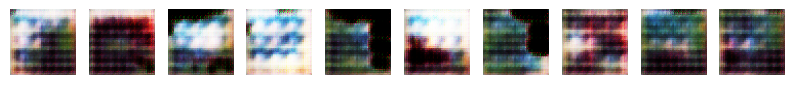

Epoch [2/51], D Loss: 1.0554250686585904, G Loss: 2.277938527870178
Epoch [3/51], D Loss: 0.9574405783236026, G Loss: 2.712390978384018
Epoch [4/51], D Loss: 0.8241378386288881, G Loss: 3.1844334632873537
Epoch [5/51], D Loss: 0.321180379599845, G Loss: 5.0317003477811815
Epoch [6/51], D Loss: 0.8121707654805388, G Loss: 3.910016108870506
Epoch [7/51], D Loss: 0.7847733962893486, G Loss: 3.1268079542398453
Epoch [8/51], D Loss: 0.5129545528918504, G Loss: 4.053976029968262
Epoch [9/51], D Loss: 0.49713087670207023, G Loss: 4.196810287332535
Epoch [10/51], D Loss: 0.44672492196559904, G Loss: 4.397680021715164
Epoch [11/51], D Loss: 0.39367232836335897, G Loss: 4.4989612008214
Generator output at epoch 10


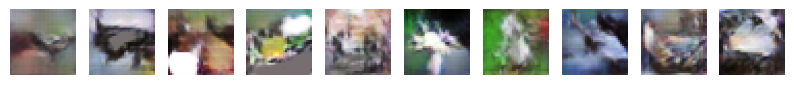

Epoch [12/51], D Loss: 0.3766452273607254, G Loss: 4.641369359350205
Epoch [13/51], D Loss: 0.3648716660924256, G Loss: 4.810872523641586
Epoch [14/51], D Loss: 0.2781868240721524, G Loss: 4.949517606925965
Epoch [15/51], D Loss: 0.29502467573583124, G Loss: 5.241914259767532
Epoch [16/51], D Loss: 0.2978487966902554, G Loss: 5.1465191498667
Epoch [17/51], D Loss: 0.3643693244621158, G Loss: 5.051075459468365
Epoch [18/51], D Loss: 0.2237844346417114, G Loss: 5.253178118777275
Epoch [19/51], D Loss: 0.3020697491634637, G Loss: 5.643882598924637
Epoch [20/51], D Loss: 0.21844945111125708, G Loss: 5.592302143889666
Epoch [21/51], D Loss: 0.2817019225418568, G Loss: 5.412879744482041
Generator output at epoch 20


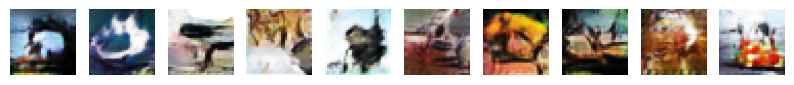

Epoch [22/51], D Loss: 0.2133575257115066, G Loss: 5.657782491916418
Epoch [23/51], D Loss: 0.21644405287578702, G Loss: 5.485975817432999
Epoch [24/51], D Loss: 0.15299859075834973, G Loss: 6.461870506668091
Epoch [25/51], D Loss: 0.19706454454809427, G Loss: 6.029252429050207
Epoch [26/51], D Loss: 0.22436651178803294, G Loss: 6.462083749222756
Epoch [27/51], D Loss: 0.1528316627967637, G Loss: 6.244014733060077
Epoch [28/51], D Loss: 0.11878812289917842, G Loss: 6.795546999645233
Epoch [29/51], D Loss: 0.3215973358302377, G Loss: 5.8682185672402385
Epoch [30/51], D Loss: 0.1573969278259203, G Loss: 6.136072561281919
Epoch [31/51], D Loss: 0.11271044828463346, G Loss: 6.4966808853060005
Generator output at epoch 30


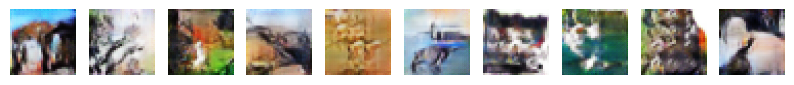

Epoch [32/51], D Loss: 0.16973116904934868, G Loss: 6.695618208265304
Epoch [33/51], D Loss: 0.19931015706509353, G Loss: 6.261137609910965
Epoch [34/51], D Loss: 0.0757117256814614, G Loss: 6.704366449451446
Epoch [35/51], D Loss: 0.25609151749257, G Loss: 6.407187582397461
Epoch [36/51], D Loss: 0.18435291154906153, G Loss: 6.470160981822014
Epoch [37/51], D Loss: 0.09571098762690089, G Loss: 6.405695514726639
Epoch [38/51], D Loss: 0.07114978439477272, G Loss: 8.205553125953674
Epoch [39/51], D Loss: 0.2956082487586886, G Loss: 6.833320853383467
Epoch [40/51], D Loss: 0.10659568534418941, G Loss: 6.705437412166596
Epoch [41/51], D Loss: 0.1297042082168162, G Loss: 6.715191620659828
Generator output at epoch 40


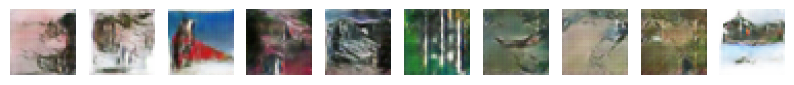

Epoch [42/51], D Loss: 0.13893711638266687, G Loss: 7.606728346252441
Epoch [43/51], D Loss: 0.11039995162691921, G Loss: 6.538780574035645
Epoch [44/51], D Loss: 0.12298256136630661, G Loss: 7.332155227088928
Epoch [45/51], D Loss: 0.1666019179175608, G Loss: 6.953397473239899
Epoch [46/51], D Loss: 0.11806626457360107, G Loss: 7.309735235390067
Epoch [47/51], D Loss: 0.07353877509855665, G Loss: 7.692998103904724
Epoch [48/51], D Loss: 0.07114695160910488, G Loss: 7.541513647842407
Epoch [49/51], D Loss: 0.16931949885138312, G Loss: 7.136821317636967
Epoch [50/51], D Loss: 0.14357538259681316, G Loss: 6.935895684480667
Epoch [51/51], D Loss: 0.13248740287536057, G Loss: 7.459637222027778
Generator output at epoch 50


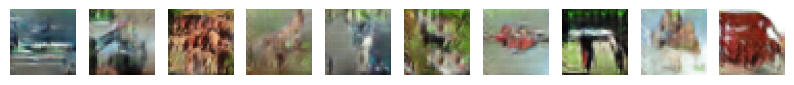

In [12]:
# Setting the Hyperparameters
z_dim = 512
img_channels = 3
feature_g = 64
feature_d = 64 # Note: reduced the number of features to minimize the vanishing gradient problem

lr = 1e-3
num_epochs = 51

# Initializing the generator and discriminator on the chosen device
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu") # Redefine device (if running separately from first chunk of code)
G = DCGAN_Generator(z_dim, img_channels, feature_g).to(device)
D = DCGAN_Discriminator(img_channels, feature_d).to(device)

# Defining the loss criterion and optimizers
criterion = nn.BCELoss()
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop:
D_losses = [] # Creating blank lists to store losses
G_losses = []

for epoch in range(num_epochs):
    D_epoch_loss = 0.0
    G_epoch_loss = 0.0
    for batch_idx, (real_images, _) in enumerate(cifar_train_loader):
        real_images = real_images.to(device)
        real_images = real_images.to(device)
        real_images = F.interpolate(real_images, size=(64, 64))  # Resize real images to 64x64

        real_labels = torch.ones(batch_size, 1).to(device).view(-1)
        fake_labels = torch.zeros(batch_size, 1).to(device).view(-1)
        fake_labels = torch.zeros(batch_size, 1).to(device).view(-1)

        # Discriminator Training
        D_optimizer.zero_grad()
        outputs = D(real_images)
        D_real_loss = criterion(outputs, real_labels)
        z = torch.randn(batch_size, z_dim, 1, 1).to(device)
        z = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        D_fake_loss = criterion(outputs, fake_labels)

        D_loss = D_real_loss + D_fake_loss
        D_loss.backward()
        D_optimizer.step()

        # Generator Training
        G_optimizer.zero_grad()
        z = torch.randn(batch_size, z_dim, 1, 1).to(torch.device('cuda:2' if torch.cuda.is_available() else 'cpu'))
        fake_images = G(z)
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        G_loss.backward()
        G_optimizer.step()

        D_epoch_loss += D_loss.item()
        G_epoch_loss += G_loss.item()

    # Appending lists of losses with calculated values
    D_losses.append(D_epoch_loss / len(cifar_train_loader))
    G_losses.append(G_epoch_loss / len(cifar_train_loader))

    # Printing loss information for the epoch to be able to keep an eye on training
    print(f'Epoch [{epoch+1}/{num_epochs}], D Loss: {D_losses[-1]}, G Loss: {G_losses[-1]}')

    # Plotting generator output every 10 epochs
    if epoch % 10 == 0:
        print(f'Generator output at epoch {epoch}')
        visualize_generator_output(G, z_dim,device=device)

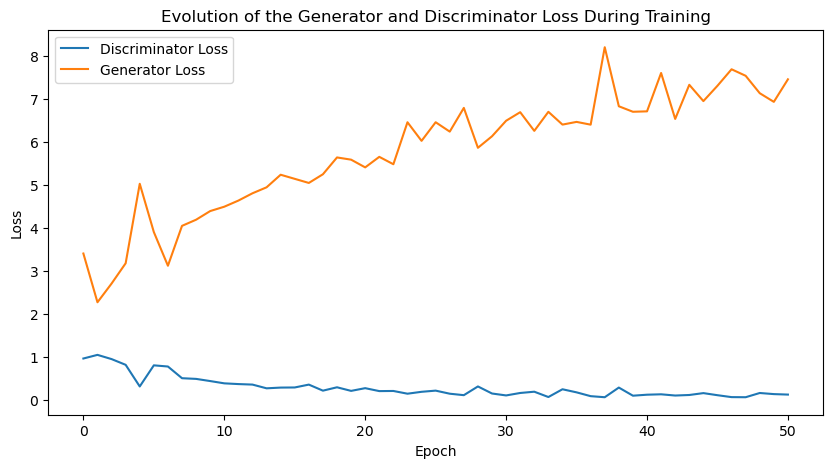

In [13]:
# Plotting the Training Results
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label='Discriminator Loss')
plt.plot(G_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolution of the Generator and Discriminator Loss During Training')
plt.show()

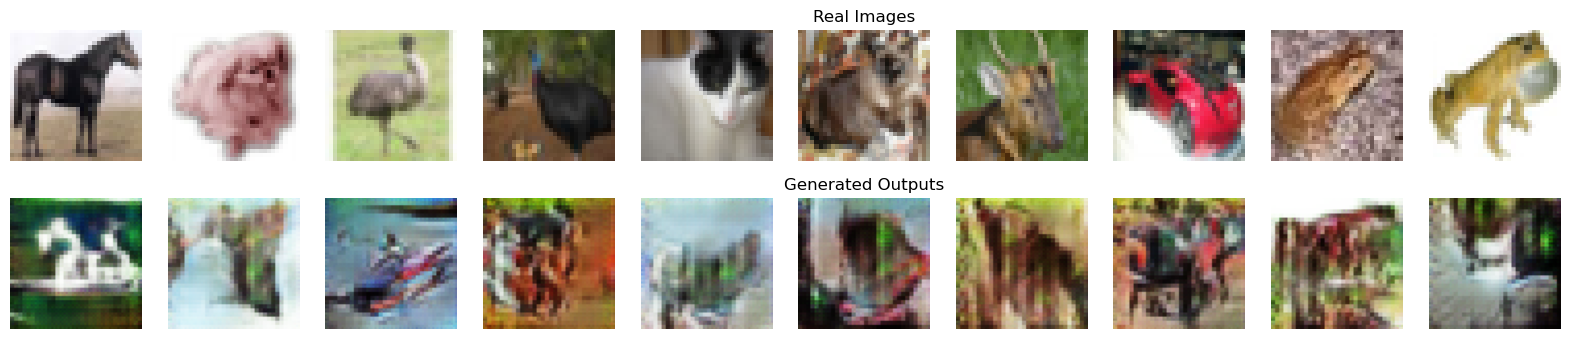

In [14]:
# Defining a function to easily compare generated CIFAR-10 outputs to real images
def visualize_comparison(G, cifar_test_loader, z_dim, device, num_images=10):
    # Generate random noise
    z = torch.randn(num_images, z_dim, 1, 1).to(device)
    
    # Generate fake images
    fake_images = G(z)
    
    # Get real images
    real_images, _ = next(iter(cifar_test_loader))
    real_images = real_images[:num_images].to(device)
    
    # Reshape fake images to 64x64
    fake_images = fake_images.view(fake_images.size(0), 3, 64, 64).cpu().detach().numpy()
    real_images = real_images.view(real_images.size(0), 3, 32, 32).cpu().detach().numpy()
    
    # Plotting the fake and real images
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Plotting the real images
        plt.subplot(2, num_images, i + 1)
        plt.imshow(np.transpose(real_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
        if i == 5:
            plt.title('Real Images')
        
        # Plotting the fake images
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(np.transpose(fake_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
        if i == 5:
            plt.title('Generated Outputs')
        
    plt.show()

# Visualize comparison between model and real CIFAR-10 images
visualize_comparison(G, cifar_test_loader, z_dim, device)

### Part 3: Latent Space Interpolation in GANs

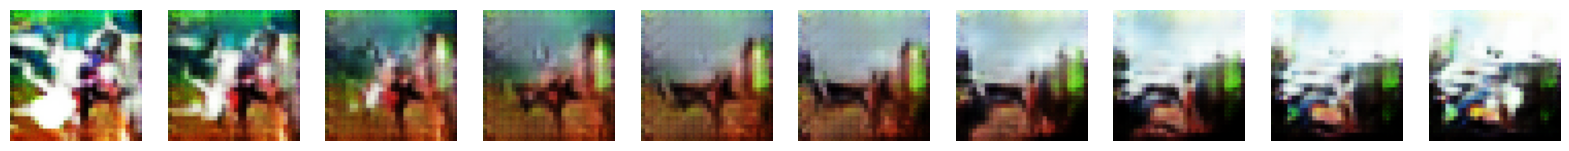

In [15]:
# Creating a function that will perform and visualize the process of latent space interpolation
def interpolate_latent_space(G, z_dim, device, num_steps=10):
    # Randomly choosing two different latent vectors
    z1 = torch.randn(1, z_dim, 1, 1).to(device)
    z2 = torch.randn(1, z_dim, 1, 1).to(device)
    
    # Interpolating between the two latent vectors
    interpolated_z = [z1 * (1 - alpha) + z2 * alpha for alpha in np.linspace(0, 1, num_steps)]
    interpolated_z = torch.cat(interpolated_z, dim=0)
    
    # Generating images from the interpolated latent vectors
    with torch.no_grad():
        interpolated_images = G(interpolated_z)
    
    # Reshape images to 64x64
    interpolated_images = interpolated_images.view(interpolated_images.size(0), 3, 64, 64).cpu().numpy()
    
    # Visualizing the resulting images
    plt.figure(figsize=(20, 2))
    for i in range(num_steps):
        plt.subplot(1, num_steps, i + 1)
        plt.imshow(np.transpose(interpolated_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
    plt.show()

# Perform latent space interpolation and visualizing the results
interpolate_latent_space(G, z_dim, device,10)

# Section 2: VAEs (Variational Autoencoders)

### Part 1: VAE Implementation for Image Generation

In [16]:
# Defining the transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])

# Downloading the MNIST datasets
path = 'data'
train_dataset = MNIST(path, transform=transform, download=True)
test_dataset  = MNIST(path, transform=transform, download=True)

# Creating the training and testing dataloaders
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
# Initializing the VAE
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        # Setting up convolutional blocks
        self.cnn_block1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=4, stride=2, padding=1)
        )
        self.cnn_block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=1)
        )
        self.cnn_block3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        )
        
        # 1x1 convolution for channel matching in skip connection
        self.skip_conv1 = nn.Conv2d(16, 32, kernel_size=1, stride=1)
        self.skip_conv2 = nn.Conv2d(32, 64, kernel_size=1, stride=1)

        # Encoder layers for latent variables
        self.Flatten = nn.Flatten()
        self.mean_layer = nn.Linear(64 * 3 * 3, 2)
        self.logvar_layer = nn.Linear(64 * 3 * 3, 2)

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(2, 64 * 3 * 3),
            nn.ReLU(),
            nn.Unflatten(1, (64, 3, 3)),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=3, padding=1),  # 3x3 -> 7x7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=2),  # 7x7 -> 14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),  # 14x14 -> 28x28
            nn.Sigmoid()
        )

    def encode(self, x):
        # Forward pass with skip connections before ReLU
        x1 = self.cnn_block1(x)  # Shape: (batch_size, 16, 14, 14)
        x2 = self.cnn_block2(x1)  # Shape: (batch_size, 32, 7, 7)
        
        # Skip connection: use 1x1 convolution to match the channels
        x1_skip = self.skip_conv1(x1)  # Now (batch_size, 32, 14, 14)
        x2 = x2 + nn.functional.interpolate(x1_skip, size=x2.shape[2:])  # Add skip connection before ReLU
        x2 = nn.ReLU()(x2)
        
        x3 = self.cnn_block3(x2)  # Shape: (batch_size, 64, 3, 3)
        
        # Skip connection between cnn_block2 and cnn_block3
        x2_skip = self.skip_conv2(x2)  # Now (batch_size, 64, 7, 7)
        x3 = x3 + nn.functional.interpolate(x2_skip, size=x3.shape[2:])  # Add skip connection before ReLU
        x3 = nn.ReLU()(x3)
        
        # Flatten and pass through latent layers
        x_flattened = self.Flatten(x3)
        mean = self.mean_layer(x_flattened)
        logvar = self.logvar_layer(x_flattened)
        return mean, logvar

    def reparameterization(self, mean, logvar):
        # Implementation of the reparameterization trick
        epsilon = torch.randn_like(logvar)
        z = mean + torch.exp(0.5 * logvar) * epsilon
        return z

    def decode(self, z):
        # Pass through the decoder
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterization(mean, logvar)
        x_hat = self.decode(z)
        return x_hat, mean, logvar

# Defining the loss function, calculating both Evidence Lower Bound loss and KL-divergence
def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
    return reproduction_loss + KLD,KLD

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initializing the model and displaying summary information
model = VAE().to(device)
summary(model, input_size=(1, 28, 28))

# Defining the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             272
            Conv2d-2             [-1, 32, 7, 7]           8,224
            Conv2d-3           [-1, 32, 14, 14]             544
            Conv2d-4             [-1, 64, 3, 3]          32,832
            Conv2d-5             [-1, 64, 7, 7]           2,112
           Flatten-6                  [-1, 576]               0
            Linear-7                    [-1, 2]           1,154
            Linear-8                    [-1, 2]           1,154
            Linear-9                  [-1, 576]           1,728
             ReLU-10                  [-1, 576]               0
        Unflatten-11             [-1, 64, 3, 3]               0
  ConvTranspose2d-12             [-1, 32, 8, 8]          32,800
             ReLU-13             [-1, 32, 8, 8]               0
  ConvTranspose2d-14           [-1, 16,

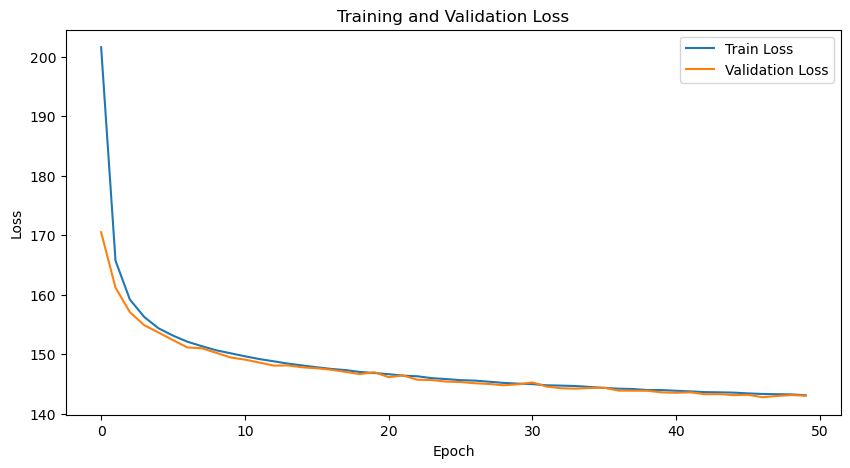

Epoch 50 	Train Loss: 143.11068188191257 	Validation Loss: 143.0306505797423


In [18]:
def train(model, optimizer, epochs, device):
    model.train()
    train_losses = []
    val_losses = []
    kld_total = []

    for epoch in range(epochs):
        overall_train_loss = 0
        overall_val_loss = 0
        overall_kld = 0

        # Training loop:
        model.train()
        for batch_idx, (x, y) in enumerate(train_loader):  # Include y in the loop
            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            x_hat, mean, log_var = model(x)
            loss , kld = loss_function(x, x_hat, mean, log_var)  # Using the provided loss function
            
            overall_train_loss += loss.sum().item()  # Adding the losses manually
            overall_kld += kld.sum().item()

            loss.mean().backward()  # Finding the mean for the backward pass
            optimizer.step()

        avg_train_loss = overall_train_loss / (batch_idx * batch_size)
        train_losses.append(avg_train_loss)
        kld_total.append(overall_kld/(batch_idx * batch_size))

        # Validation loop:
        model.eval()
        with torch.no_grad():
            for batch_idx, (x, y) in enumerate(test_loader):
                x = x.to(device)
                y = y.to(device)

                x_hat, mean, log_var = model(x)
                val_loss,_ = loss_function(x, x_hat, mean, log_var)
                
                overall_val_loss += val_loss.sum().item()

        avg_val_loss = overall_val_loss / (batch_idx * batch_size)
        val_losses.append(avg_val_loss)

        # Plotting the loss
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

        print(f"Epoch {epoch + 1} \tTrain Loss: {avg_train_loss} \tValidation Loss: {avg_val_loss}")
    
    return train_losses, val_losses,kld_total

train_losses, val_losses, kld_total = train(model, optimizer, epochs=50, device=device)

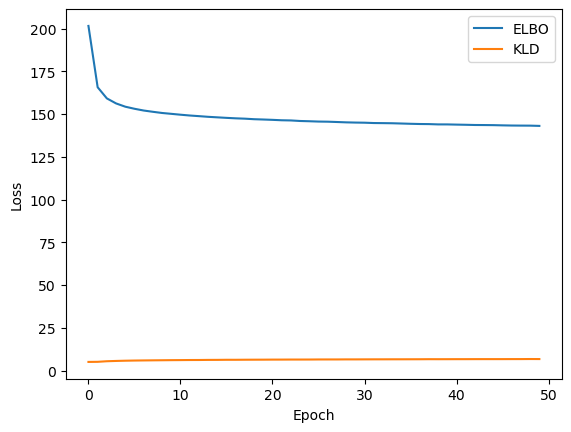

In [19]:
plt.plot(train_losses, label='ELBO')
plt.plot(kld_total, label='KLD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

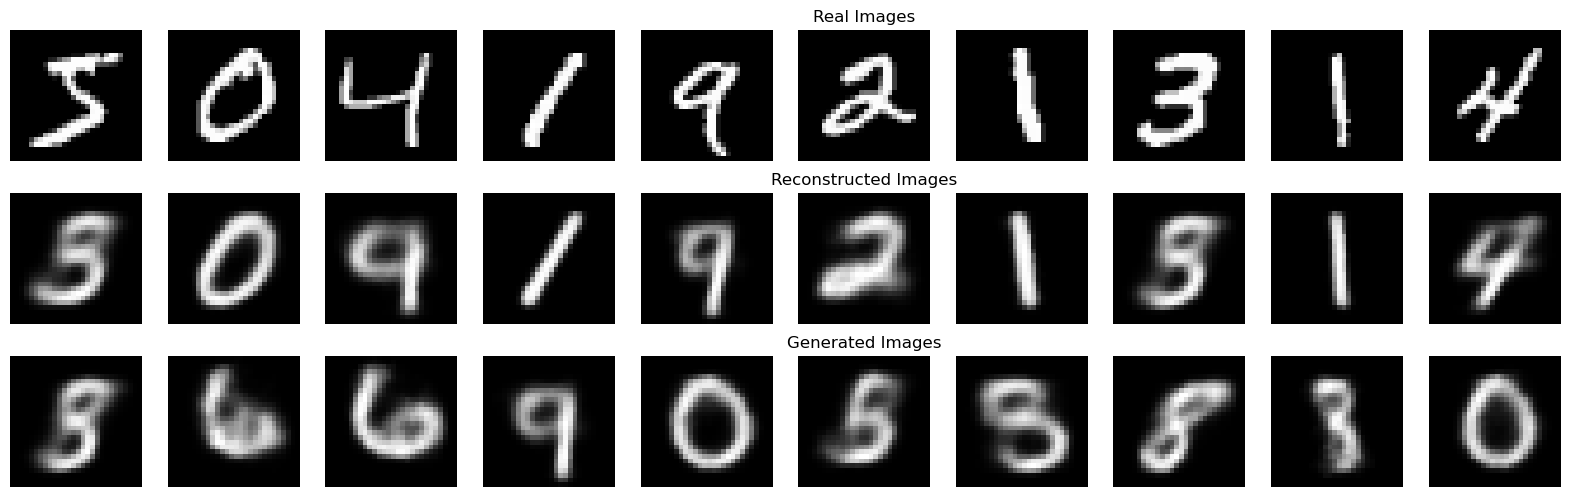

In [20]:
def visualize_reconstruction_and_generation(model, test_loader, z_dim, device, num_images=10):
    model.eval()
    
    # Sample a batch of real images
    real_images, _ = next(iter(test_loader))
    real_images = real_images[:num_images].to(device)
    
    # Reconstruct sampled images
    with torch.no_grad():
        reconstructed_images, _, _ = model(real_images)
    
    # Generate new images
    z = torch.randn(num_images, z_dim).to(device)
    with torch.no_grad():
        generated_images = model.decode(z)
    
    # Move images to CPU and convert to numpy
    real_images = real_images.cpu().numpy()
    reconstructed_images = reconstructed_images.cpu().numpy()
    generated_images = generated_images.cpu().numpy()
    
    # Plot the images
    plt.figure(figsize=(20, 6))
    
    for i in range(num_images):
        # Plot real images
        plt.subplot(3, num_images, i + 1)
        plt.imshow(real_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_images // 2:
            plt.title('Real Images')
        
        # Plot reconstructed images
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_images // 2:
            plt.title('Reconstructed Images')
        
        # Plot generated images
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_images // 2:
            plt.title('Generated Images')
    
    plt.show()

# Visualize reconstruction and generation
visualize_reconstruction_and_generation(model, test_loader, z_dim=2, device=device)

### Part 2: VAE for Anomaly Detection

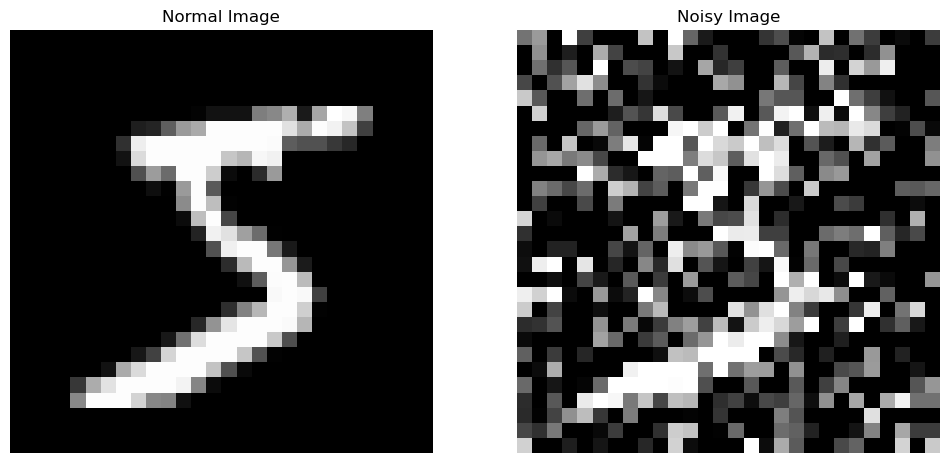

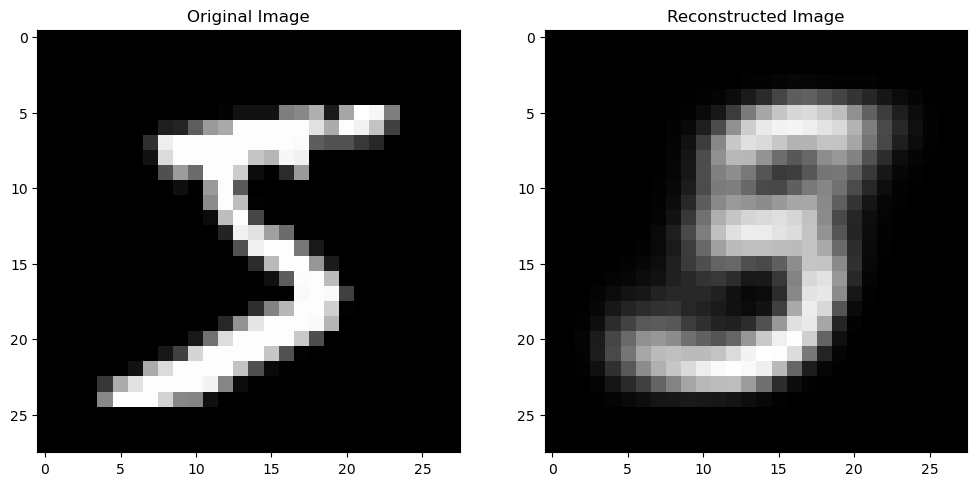

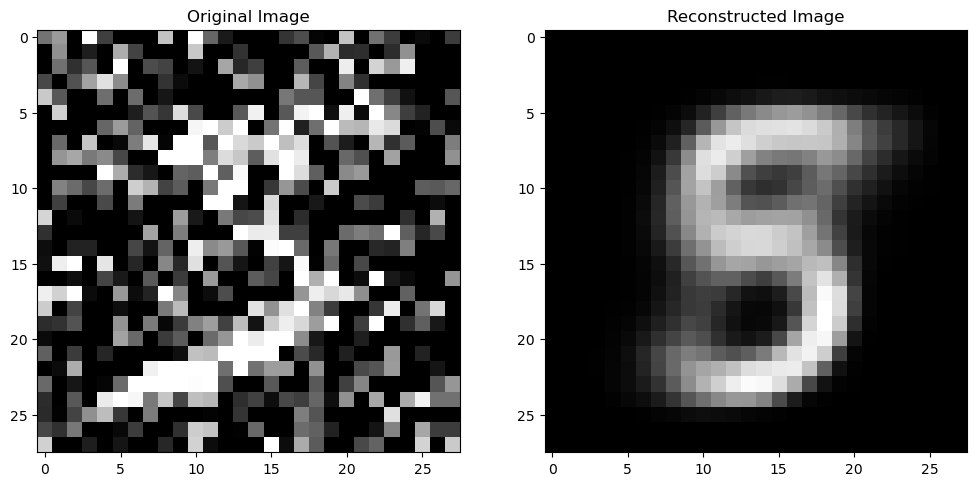

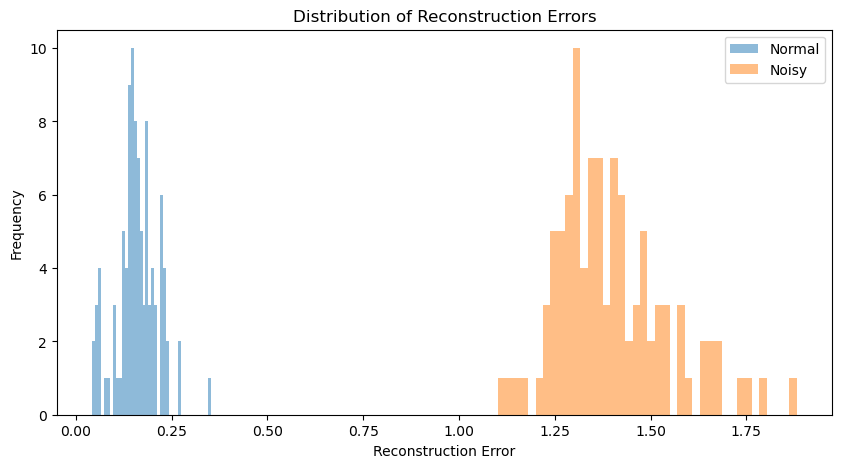

Normal images classified as anomalous: 5 / 100
Noisy images classified as anomalous: 100 / 100


In [21]:
# Defining a function to create noisy images (i.e. anomalies that we hope to detect)
def add_noise_to_images(images, noise_factor=0.5):
    noisy_images = images + noise_factor * torch.randn(*images.shape)
    noisy_images = torch.clip(noisy_images, 0., 1.)
    return noisy_images

# Defining a function to calculate the reconstruction error
def calculate_reconstruction_error(model, images, device):
    model.eval()
    images = images.to(device)
    with torch.no_grad():
        reconstructed_images, _, _ = model(images)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[1].imshow(reconstructed_images[0].cpu().numpy().squeeze(),cmap='gray')
    axs[1].set_title('Reconstructed Image')
    axs[0].imshow(images[0].cpu().numpy().squeeze(),cmap='gray')
    axs[0].set_title('Original Image')
    plt.show()

    reconstruction_error = torch.nn.functional.binary_cross_entropy(reconstructed_images, images, reduction='none')
    reconstruction_error = torch.mean(reconstruction_error, dim=[1, 2, 3])
    return reconstruction_error.cpu().numpy()

# Sample a batch of normal images
normal_images, _ = next(iter(test_loader))
# Take images from the test_loader randomly
random_indices = random.sample(range(len(test_loader.dataset)), batch_size)
random_sampler = torch.utils.data.Subset(test_loader.dataset, random_indices)
random_loader = DataLoader(random_sampler, batch_size=batch_size, shuffle=False)

# Creating noisy images by adding noise to the normal images
noisy_images = add_noise_to_images(normal_images)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first noisy image
axes[1].imshow(noisy_images[0].squeeze(), cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

# Plot the first normal image
axes[0].imshow(normal_images[0].squeeze(), cmap='gray')
axes[0].set_title('Normal Image')
axes[0].axis('off')
plt.show()

# Calculate the reconstruction errors
normal_reconstruction_errors = calculate_reconstruction_error(model, normal_images, device)
noisy_reconstruction_errors = calculate_reconstruction_error(model, noisy_images, device)

# Plot the distribution of the reconstruction errors
plt.figure(figsize=(10, 5))
plt.hist(normal_reconstruction_errors, bins=40, alpha=0.5, label='Normal')
plt.hist(noisy_reconstruction_errors, bins=40, alpha=0.5, label='Noisy')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Reconstruction Errors')
plt.show()

# Set a threshold to classify images as "anomalous" or "normal"
threshold = np.percentile(normal_reconstruction_errors, 95)

# Classify images based on the classification threshold
normal_classification = normal_reconstruction_errors > threshold
noisy_classification = noisy_reconstruction_errors > threshold

# Display classification results
print(f'Normal images classified as anomalous: {np.sum(normal_classification)} / {len(normal_classification)}')
print(f'Noisy images classified as anomalous: {np.sum(noisy_classification)} / {len(noisy_classification)}')

### Part 3: VAE Latent Space Visualization

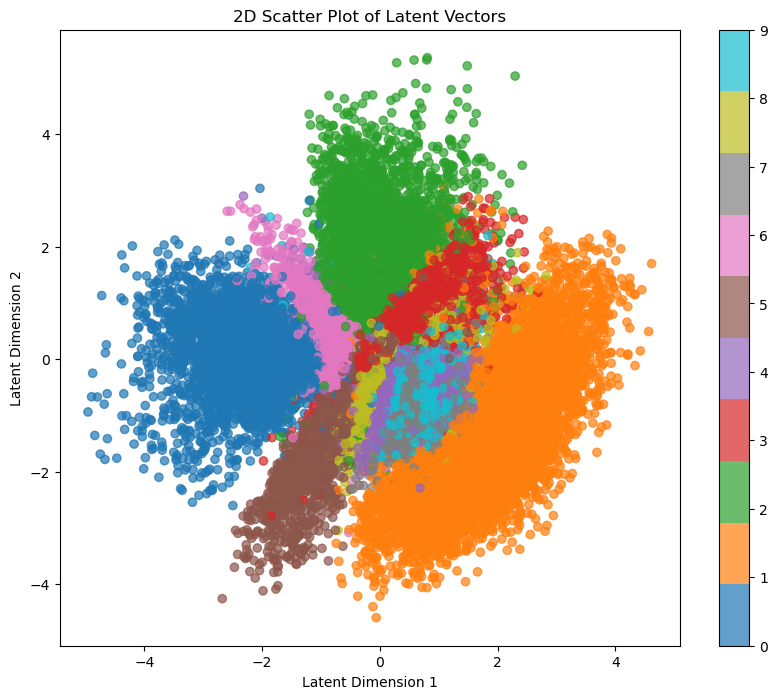

In [22]:
# Defining a function to visualize the latent space
def visualize_latent_space(model, data_loader, device):
    model.eval()
    latent_vectors = []
    labels = []

    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            mean, logvar = model.encode(x)
            z = model.reparameterization(mean, logvar)
            latent_vectors.append(z.cpu().numpy())
            labels.append(y.cpu().numpy())

    latent_vectors = np.concatenate(latent_vectors, axis=0)
    labels = np.concatenate(labels, axis=0)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(10))
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('2D Scatter Plot of Latent Vectors')
    plt.show()

# Visualize the latent space
visualize_latent_space(model, test_loader, device)